In [243]:
using Plots

In [244]:
function get_points(κ)
    h = Float64(0.01)
    ϕ = π / 3.0
    g = Float64(9.81)
    x = Float64[0.0]
    y = Float64[0.0]
    u = Float64[100*cos(ϕ)]
    v = Float64[100*sin(ϕ)]
    z = Float64[]
    i = 1
    while y[i]>=0.0
        push!(z, κ*sqrt(u[i]*u[i]+v[i]*v[i])) 
        push!(u, u[i] - h * z[i] * u[i])
        push!(v, v[i] - h * (g + z[i] * v[i]))
        push!(x, x[i] + h * u[i])
        push!(y, y[i] + h * v[i])
        i += 1
    end
    return x, y, u, v
end

get_points (generic function with 1 method)

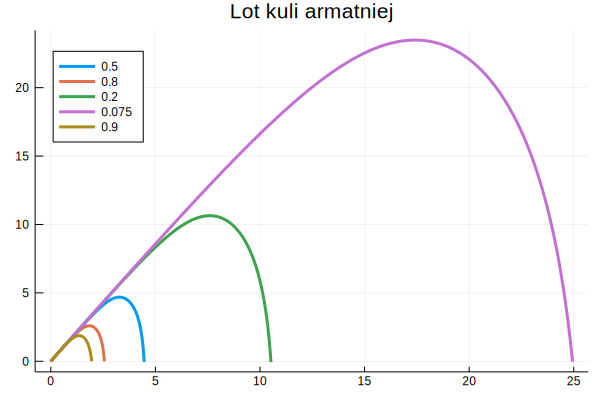

In [245]:
x, y, u, v = get_points(0.5)
plot(x, y, seriestype = :line, lw=3,
    title="Lot kuli armatniej", label=["0.5", "0.8", "0.2", "0.075", "0.9"], legend = :topleft)
x, y, u, v = get_points(0.8)
plot!(x, y, seriestype = :line, lw=3,
    title="Lot kuli armatniej", label=["0.5", "0.8", "0.2", "0.075", "0.9"], legend = :topleft)
x, y, u, v = get_points(0.2)
plot!(x, y, seriestype = :line, lw=3,
    title="Lot kuli armatniej", label=["0.5", "0.8", "0.2", "0.075", "0.9"], legend = :topleft)
x, y, u, v = get_points(0.075)
plot!(x, y, seriestype = :line, lw=3,
    title="Lot kuli armatniej", label=["0.5", "0.8", "0.2", "0.075", "0.9"], legend = :topleft)
x, y, u, v = get_points(0.9)
plot!(x, y, seriestype = :line, lw=3,
    title="Lot kuli armatniej", label=["0.5", "0.8", "0.2", "0.075", "0.9"], legend = :topleft)

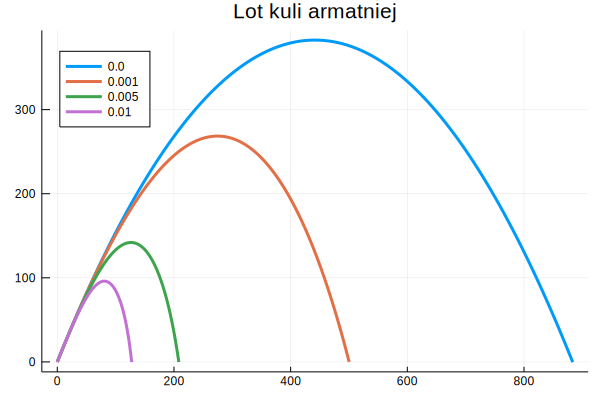

In [246]:
x, y, u, v = get_points(0.0)
plot(x, y, seriestype = :line, lw=3,
    title="Lot kuli armatniej", label=["0.0", "0.001", "0.005", "0.01"], legend = :topleft)
x, y, u, v = get_points(0.001)
plot!(x, y, seriestype = :line, lw=3,
    title="Lot kuli armatniej", label=["0.0", "0.001", "0.005", "0.01"], legend = :topleft)
x, y, u, v = get_points(0.005)
plot!(x, y, seriestype = :line, lw=3,
    title="Lot kuli armatniej", label=["0.0", "0.001", "0.005", "0.01"], legend = :topleft)
x, y, u, v = get_points(0.01)
plot!(x, y, seriestype = :line, lw=3,
    title="Lot kuli armatniej", label=["0.0", "0.001", "0.005", "0.01"], legend = :topleft)

In [247]:
function f(t, y1)
    κ = 0.2
    h = Float64(0.01)
    g = Float64(9.81)
    u, v, x, y = y1[1], y1[2], y1[3], y1[4]
    z = κ*sqrt(u*u+v*v)
    y2 = [- z * u, -(g + z * v), u, v]
    return y2
end

f (generic function with 1 method)

In [248]:
function RK4()
    h = Float64(0.01)
    g = Float64(9.81)
    w = []
    ϕ = π / 3.0
    y = [100.0*cos(ϕ), 100.0*sin(ϕ), 0.0, 0.0]
    push!(w, y)
    i = 1
    t = 0.0
    while y[4] >= 0.0
        K1 = f(t, y)
        K2 = f(t + h/2.0, y + h*K1*0.5)
        K3 = f(t + h/2.0, y + h*K2*0.5)
        K4 = f(t + h, y + h*K3)
        y = y + (h/6.0)*(K1 + 2*(K2+K3)+ K4)
        push!(w, y)
        t = t+h
        i += 1
    end
    return w
end

RK4 (generic function with 2 methods)

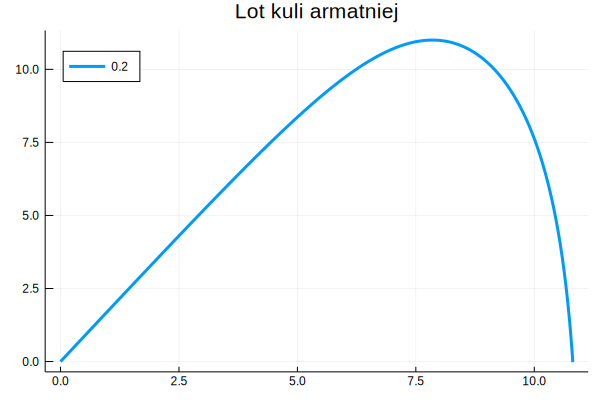

In [251]:
w = RK4()
x, y = [], []
for row in w
    push!(x, row[3])
    push!(y, row[4])
end
plot(x, y, seriestype = :line, lw=3,
    title="Lot kuli armatniej", label=["0.2"], legend = :topleft)

In [2]:
function metoda_zlozona_trapezow(f::Function, a::Float64, b::Float64, n::Int64)
    suma = 0.0
    h = (b-a)/Float64(n)
    for i = 1 : n-1
        suma = suma + f(a + i*h)
    end
    wynik = 0.5*h*(f(a) + f(b) + 2*suma)
    return wynik
end

metoda_zlozona_trapezow (generic function with 1 method)

In [3]:
function metoda_zlozona_trapezow_posrednie_do_exp_2_n(f::Function, a::Float64, b::Float64, n::Int64)
    wyniki = zeros(Float64, n+1)
    h = (b-a)
    wyk = 1
    x_i = 0.0
    wyniki[1] = 0.5*h*(f(a) + f(b))
    for k = 1 : n
        suma = 0.0
        h = h/2
        for i = 1 : wyk
            suma = suma + f(a+(2*i-1)*h)
        end
        wyniki[k+1] = 0.5 * wyniki[k] + h * suma
        wyk = wyk*2
    end
    return wyniki
end

metoda_zlozona_trapezow_posrednie_do_exp_2_n (generic function with 1 method)

In [4]:
function metoda_romberga(f::Function, a::Float64, b::Float64, n::Int64)
    R = metoda_zlozona_trapezow_posrednie_do_exp_2_n(f, a, b, n)
    pot4 = 1.0
    for k = 1 : n
        pot4 = pot4 * 4.0
        for i = n :-1: k
            R[i+1] = (pot4 * R[i+1] - R[i])/(pot4 - 1)
        end
    end
    return R[n+1]
end

metoda_romberga (generic function with 1 method)

In [5]:
function c(x)
    if x>= sqrt(3.0)/2
        return 0.5
    else
        return sqrt(1-x*x)
    end
end

c (generic function with 1 method)

In [6]:
function ψ(x, y)
    return sin(y) * sin(y) * 1.0/sqrt(1+x*x+y*y)
end

ψ (generic function with 1 method)

In [18]:
function ϕ(x)
    return metoda_romberga(y -> ψ(x, y), Float64(-c(x)), Float64(c(x)), Int64(10))
end

ϕ (generic function with 1 method)

In [19]:
function I()
    return metoda_romberga(x -> sin(x)*sin(x)*ϕ(x), Float64(-1.0), Float64(3.0), Int64(10))
end

I (generic function with 1 method)

In [20]:
print(I())

0.13201912198409324